In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import warnings
warnings = 'ignore'
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
sns.set(rc={'figure.figsize':(16,8)})
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error

# from xgboost import XGBRegressor as xbr

In [2]:
df = pd.read_csv("c:/Users/Zayan/Documents/code/personal_repos/neural_nets/ECE_8770/project_2/data/Microsoft_Stock.csv")

df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [3]:
df = df[['Date','Close']]

In [4]:
df.head()

,Date,Close
0,4/1/2015 16:00:00,40.72
1,4/2/2015 16:00:00,40.29
2,4/6/2015 16:00:00,41.55
3,4/7/2015 16:00:00,41.53
4,4/8/2015 16:00:00,41.42


# Coverting into DateTime

In [5]:
import datetime

def obj_date (s):
    
    date_part, time_part = s.split(" ")
    split = date_part.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    
    return datetime.datetime(month = month, day = day, year = year)
    
    

In [6]:
example_date = obj_date('4/1/2015 16:00:00')

example_date

datetime.datetime(2015, 4, 1, 0, 0)

In [7]:
df['Date'] = df['Date'].apply(obj_date)

C:\Users\Zayan\AppData\Local\Temp\ipykernel_36756\3910606820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(obj_date)


In [8]:
df = df.set_index('Date')


In [9]:
df.head(22)

,Close
Date,
2015-04-01,40.72
2015-04-02,40.29
2015-04-06,41.55
2015-04-07,41.53
2015-04-08,41.42
2015-04-09,41.48
2015-04-10,41.72
2015-04-13,41.76
2015-04-14,41.65


In [20]:
scaler = MinMaxScaler()

df['Close'] = scaler.fit_transform(df[['Close']])

df

,Close
Date,
2015-04-01,0.002101
2015-04-02,0.000000
2015-04-06,0.006155
2015-04-07,0.006058
2015-04-08,0.005520
...,...
2021-03-25,0.938202
2021-03-26,0.958427
2021-03-29,0.952369


In [21]:
df.to_csv("c:/Users/Zayan/Documents/code/personal_repos/neural_nets/ECE_8770/project_2/data/msft_stock/msft_stock_close.csv")

<Axes: title={'center': 'Stock pattern by Year'}, xlabel='Date'>

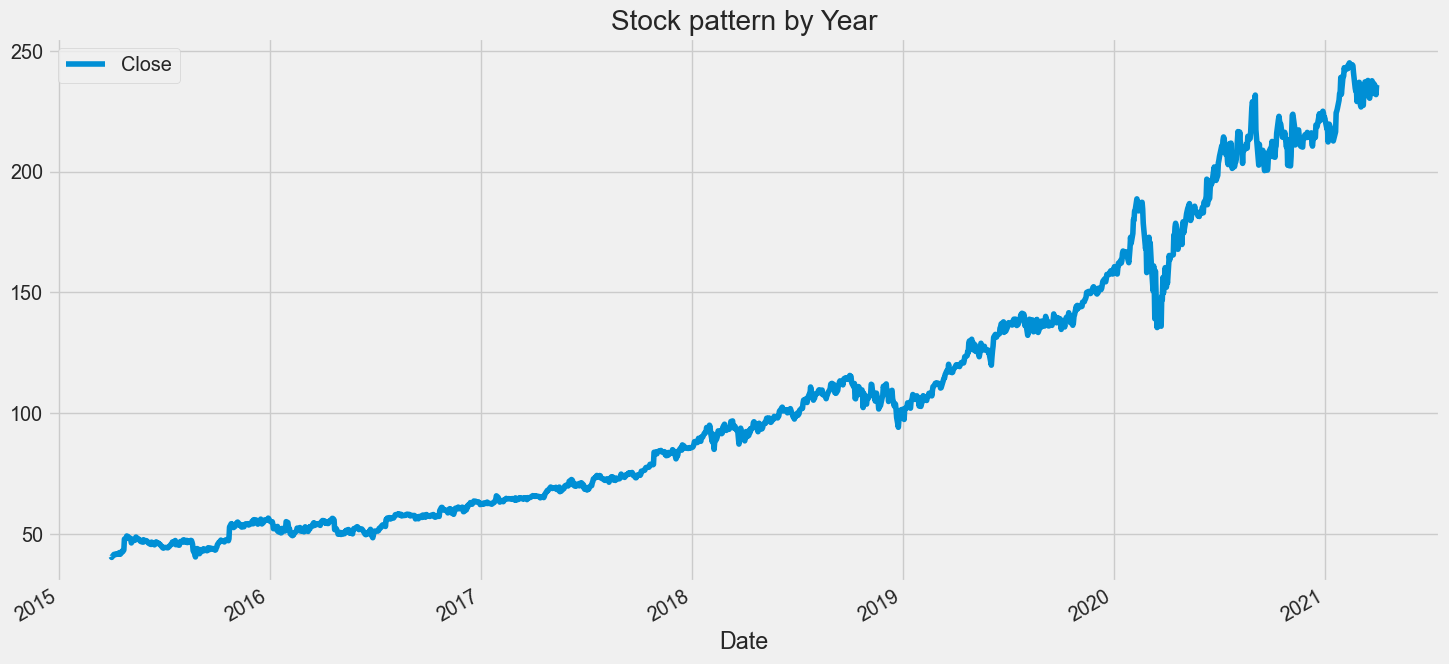

In [18]:
df.plot(title = "Stock pattern by Year")
# plt.axvline('2018-6-01', color='white', linestyle='--')
# plt.axvline('2019-12-01', color='white', linestyle='--')

# Prepareing Data for LSTM

In [13]:
from copy import deepcopy as dc

def lstm_data (data, n_steps):
    
    data = dc(data)
    
    for i in range(1, n_steps+1):
        data[f'close(t-{i})'] = data['Close'].shift(i)
        
    data.dropna(inplace =True)
    
    return data

lookback = 20
shifted_df = lstm_data(df, lookback)

shifted_df

,Close,close(t-1),close(t-2),close(t-3),close(t-4),close(t-5),close(t-6),close(t-7),close(t-8),close(t-9),...,close(t-11),close(t-12),close(t-13),close(t-14),close(t-15),close(t-16),close(t-17),close(t-18),close(t-19),close(t-20)
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,48.64,49.06,49.16,48.03,47.87,43.34,42.99,42.64,42.91,41.62,...,42.26,41.65,41.76,41.72,41.48,41.42,41.53,41.55,40.29,40.72
2015-05-01,48.66,48.64,49.06,49.16,48.03,47.87,43.34,42.99,42.64,42.91,...,42.16,42.26,41.65,41.76,41.72,41.48,41.42,41.53,41.55,40.29
2015-05-04,48.24,48.66,48.64,49.06,49.16,48.03,47.87,43.34,42.99,42.64,...,41.62,42.16,42.26,41.65,41.76,41.72,41.48,41.42,41.53,41.55
2015-05-05,47.60,48.24,48.66,48.64,49.06,49.16,48.03,47.87,43.34,42.99,...,42.91,41.62,42.16,42.26,41.65,41.76,41.72,41.48,41.42,41.53
2015-05-06,46.28,47.60,48.24,48.66,48.64,49.06,49.16,48.03,47.87,43.34,...,42.64,42.91,41.62,42.16,42.26,41.65,41.76,41.72,41.48,41.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,232.34,235.46,237.58,235.99,230.35,230.72,237.04,237.71,234.81,235.75,...,232.42,233.78,227.39,231.60,226.73,227.56,233.87,236.94,232.38,228.99
2021-03-26,236.48,232.34,235.46,237.58,235.99,230.35,230.72,237.04,237.71,234.81,...,237.13,232.42,233.78,227.39,231.60,226.73,227.56,233.87,236.94,232.38
2021-03-29,235.24,236.48,232.34,235.46,237.58,235.99,230.35,230.72,237.04,237.71,...,235.75,237.13,232.42,233.78,227.39,231.60,226.73,227.56,233.87,236.94


In [14]:
shifted_df_np = shifted_df.to_numpy()

In [15]:
shifted_df_np

array([[ 48.64,  49.06,  49.16, ...,  41.55,  40.29,  40.72],
       [ 48.66,  48.64,  49.06, ...,  41.53,  41.55,  40.29],
       [ 48.24,  48.66,  48.64, ...,  41.42,  41.53,  41.55],
       ...,
       [235.24, 236.48, 232.34, ..., 227.56, 233.87, 236.94],
       [231.85, 235.24, 236.48, ..., 226.73, 227.56, 233.87],
       [235.77, 231.85, 235.24, ..., 231.6 , 226.73, 227.56]])

# Scaleing Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (-1,1))
shifted_df_np = scaler.fit_transform(shifted_df_np)
shifted_df_np

array([[-0.92010561, -0.91599844, -0.91502054, ..., -0.98943869,
        -1.        , -0.99579873],
       [-0.91991003, -0.92010561, -0.91599844, ..., -0.98963427,
        -0.9876893 , -1.        ],
       [-0.92401721, -0.91991003, -0.92010561, ..., -0.99070996,
        -0.98788471, -0.9876893 ],
       ...,
       [ 0.9046548 ,  0.91678075,  0.87629572, ...,  0.82955212,
         0.8913532 ,  0.92134831],
       [ 0.87150401,  0.9046548 ,  0.91678075, ...,  0.82143556,
         0.829702  ,  0.8913532 ],
       [ 0.90983767,  0.87150401,  0.9046548 , ...,  0.86905926,
         0.82159257,  0.829702  ]])

In [15]:
x = shifted_df_np[:, 1:]
y = shifted_df_np[:, 0]

x.shape, y.shape

((1491, 20), (1491,))

In [16]:
x = dc(np.flip(x, axis =1))

In [17]:
split_index = int(len(x) * 0.70)
split_index

1043

In [18]:
x_train = x[:split_index]
y_train = y[:split_index]

x_test = x[split_index:]
y_test = y[split_index:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1043, 20), (1043,), (448, 20), (448,))

# 3D Dimensions for LSTM

In [19]:
import torch
import torch.nn as nn

In [20]:
x_train = x_train.reshape((-1, lookback, 1))
y_train = y_train.reshape((-1,1))

x_test = x_test.reshape((-1, lookback, 1))
y_test = y_test.reshape((-1,1))

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1043, 20, 1), (1043, 1), (448, 20, 1), (448, 1))

# Pytorch take Tensors

In [21]:
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()
x_test = torch.tensor(x_test).float()
y_test = torch.tensor(y_test).float()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([1043, 20, 1]),
 torch.Size([1043, 1]),
 torch.Size([448, 20, 1]),
 torch.Size([448, 1]))

# Converting tensors to dataset then dataloader

In [22]:
from torch.utils.data import Dataset, DataLoader

class TimeseriesData(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]


train_data = TimeseriesData(x_train, y_train)
test_data = TimeseriesData(x_test, y_test)

In [23]:
batch_size = 16

train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle = False)

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 20, 1]) torch.Size([16, 1])


In [25]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [26]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [27]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [28]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1

Val Loss: 0.324
***************************************************

Epoch: 2

Val Loss: 0.479
***************************************************

Epoch: 3

Val Loss: 0.631
***************************************************

Epoch: 4

Val Loss: 0.730
***************************************************

Epoch: 5

Val Loss: 0.752
***************************************************

Epoch: 6

Val Loss: 0.706
***************************************************

Epoch: 7

Val Loss: 0.626
***************************************************

Epoch: 8

Val Loss: 0.518
***************************************************

Epoch: 9

Val Loss: 0.417
***************************************************

Epoch: 10

Val Loss: 0.361
***************************************************



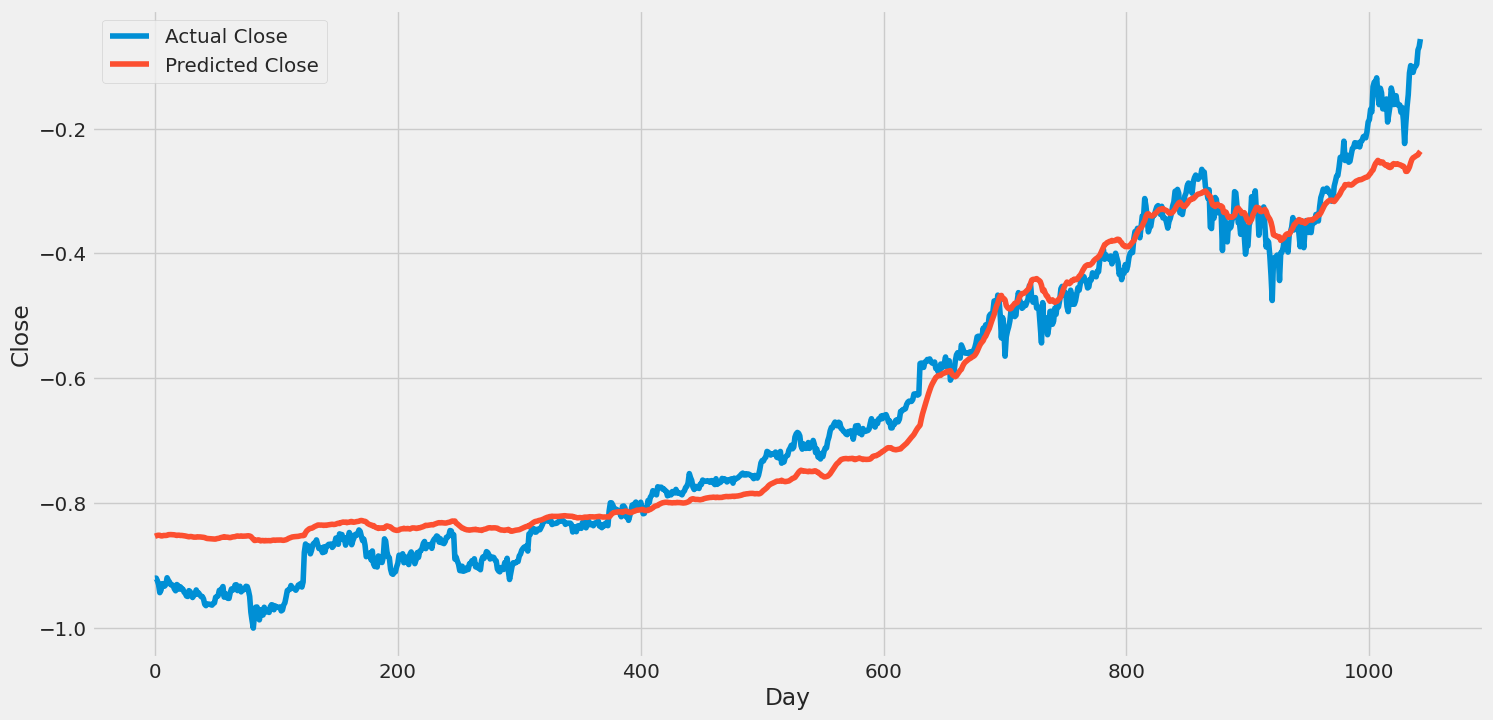

In [29]:
with torch.no_grad():
    predicted = model(x_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()

In [30]:
train_predictions = predicted.flatten()

dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([ 55.5106938 ,  55.58331776,  55.656728  , ..., 117.98622677,
       118.31327078, 118.56671866])

In [31]:
dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([ 48.63999765,  48.660002  ,  48.24000206, ..., 135.16000031,
       135.68999981, 136.95000003])

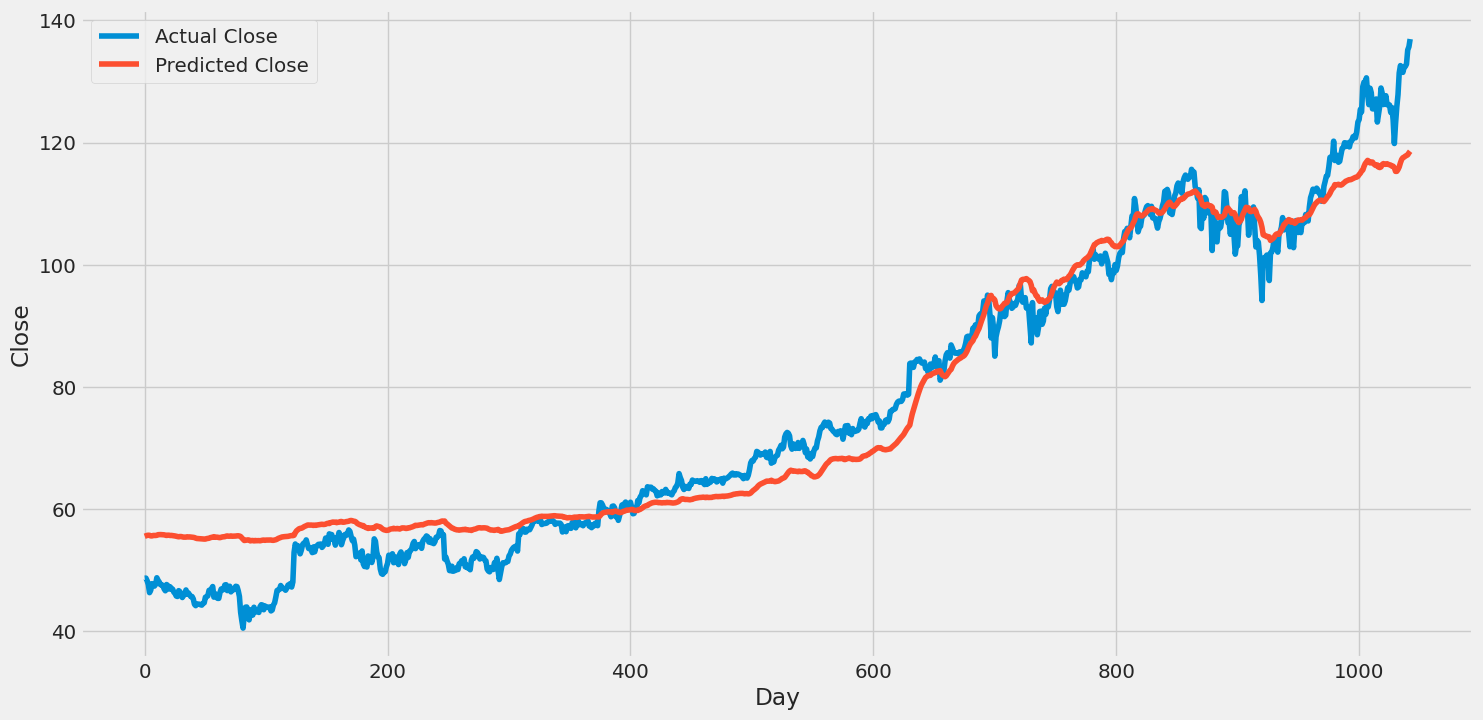

In [32]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()
